In [1]:
import numpy as np
import numpy.random as npr
import cvxpy as cp
import time
import matplotlib.pyplot as plt

from formulations_flipped import *
from utils import *

import os
import imageio

## Experiments for 20 Question Flipped Individual

In [2]:
m = 30
n = 8
trials = 1
Data_mat = np.zeros((trials, n))
Data_mat_lp = np.zeros((trials, n))
Data_mat_sdp = np.zeros((trials, n))

Data_col = np.zeros((trials, n))
Data_col_lp = np.zeros((trials, n))
Data_col_sdp = np.zeros((trials, n))

x_true_mat = np.zeros((n,n))
x_lp_mat = np.zeros((n,n))

y_true_mat = np.zeros((n, m))

npr.seed(0)
K_mat = rand_01_mat(m,n)
w = np.ones(n)
for k in range(n):
    print("%.2f" %((k+1)/n), end = "\r")
    for trial in range(trials):
        # K_mat = rand_01_mat(m,n)

        # K_col = rand_01_col_mat(m,n)
        # w = npr.randint(1,5,n)
        Data_mat[trial,k], x_true_mat[k,:], _ = misp_flip(K_mat,w,k + 1)
        Data_mat_lp[trial,k], x_lp_mat[k,:], _ = misp_lp_flip(K_mat,w,k+1)
        Data_mat_sdp[trial,k], _  = misp_sdp_flip(K_mat,w,k+1)

        # Data_col[trial,r], _, _ = misp(K_col,w,r)
        # Data_col_lp[trial,r], _, _ = misp_lp(K_col,w,r)
        # Data_col_sdp[trial,r], _ = misp_sdp(K_col,w,r)

        #### GROUP ####
        # Data_mat[trial,r], x_true_mat[r,:] = misp_grp(K_mat,w,r)
        # Data_mat_lp[trial,r], x_lp_mat[r,:] = misp_grp_lp(K_mat,w,r)



## Compare Values for normal matrix

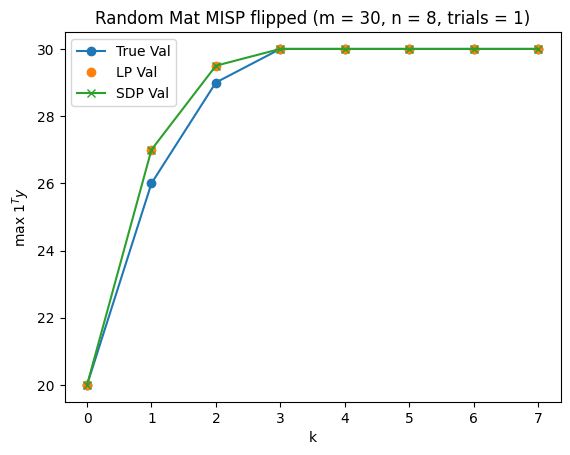

In [10]:
plt.plot(np.mean(Data_mat, axis=0),'o-', label="True Val")
plt.plot(np.mean(Data_mat_lp, axis=0),'o',label="LP Val")
plt.plot(np.mean(Data_mat_sdp, axis=0), 'x-', label="SDP Val")
plt.xlabel("k")
plt.ylabel("max $1^T y$")
plt.title("Random Mat MISP flipped (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

In [11]:
Data_mat

array([[20., 26., 29., 30., 30., 30., 30., 30.]])

In [12]:
Data_mat_lp

array([[20. , 27. , 29.5, 30. , 30. , 30. , 30. , 30. ]])

In [12]:
m, n = 5, 4
np.where(npr.rand(m,n) < 0.5, np.ones((5,4)), np.zeros((5,4)))

array([[1., 0., 1., 1.],
       [1., 1., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 1., 0.],
       [1., 1., 0., 0.]])